In [1]:
import intvalpy as ip

import numpy as np
import matplotlib.pyplot as plt


from time import perf_counter as pc

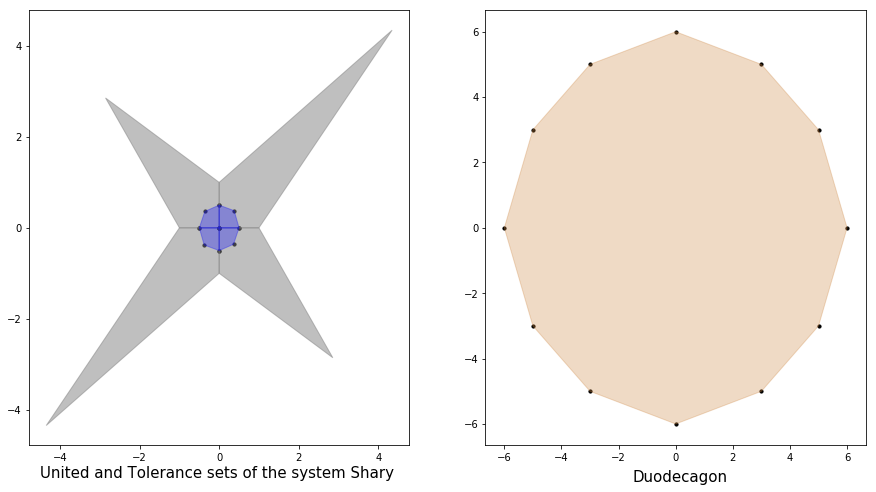

In [2]:
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

A, b = ip.Shary(2)
vertices1 = ip.IntLinIncR2(A, b, show=False)
vertices2 = ip.IntLinIncR2(A, b, consistency='tol', show=False)

A = -np.array([[-3, -1],
              [-2, -2],
              [-1, -3],
              [1, -3],
              [2, -2],
              [3, -1],
              [3, 1],
              [2, 2],
              [1, 3],
              [-1, 3],
              [-2, 2],
              [-3, 1]])
b = -np.array([18,16,18,18,16,18,18,16,18,18,16,18])
vertices3 = ip.lineqs(A, b, show=False)

for k in range(len(vertices1)):
    if len(vertices1[k])>0:
        x, y = vertices1[k][:,0], vertices1[k][:,1]
        ax[0].fill(x, y, linestyle = '-', linewidth = 1, color='gray', alpha=0.5)
        ax[0].scatter(x, y, s=0, color='black', alpha=1)
        
for k in range(len(vertices2)):
    if len(vertices2[k])>0:
        x, y = vertices2[k][:,0], vertices2[k][:,1]
        ax[0].fill(x, y, linestyle = '-', linewidth = 1, color='blue', alpha=0.3)
        ax[0].scatter(x, y, s=10, color='black', alpha=1)
        
ax[0].text(-4.5, -5.5, 'United and Tolerance sets of the system Shary',
           rotation = 0,
           fontsize = 15)      

x, y = vertices3[:,0], vertices3[:,1]
ax[1].fill(x, y, linestyle = '-', linewidth = 1, color='peru', alpha=0.3)
ax[1].scatter(x, y, s=10, color='black', alpha=1)
ax[1].text(-1.5, -7.77, 'Duodecagon',
           rotation = 0,
           fontsize = 15);

# fig.savefig('SolSet.png')

In [3]:
# A = ip.Interval([[2, -2],[-1, 2]], [[4,1],[2,4]])
# b = ip.Interval([-2, -2], [2, 2])
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+ #
# Gauss(A, b)                                                         #
# interval(['[-5.000000, 5.000000]', '[-4.000000, 4.000000]'])        #
#                                                                     #
# Gauss-Seidel(A, b, P=True)                                          #
# interval(['[-14.000000, 14.000000]', '[-14.000000, 14.000000]'])    #
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+ #


A = ip.Interval([[0.5, -0.456], [-0.438, 0.624]], 
                [[1.176, 0.448], [0.596, 1.36]])
b = ip.Interval([0.316, 0.27], [0.632, 0.624])
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+ #
# Gauss(A, b)                                                         #
# interval(['[-11.094065, 13.199459]', '[-5.371444, 13.087127]'])     #
#                                                                     #
# Gauss-Seidel(A, b, P=False)                                         #
# interval(['[-4.266757, 6.076814]', '[-5.371444, 5.265456]'])        #
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+ #


print('Gauss: ', ip.Gauss(A, b))
print('Gauss_Seidel: ', ip.Gauss_Seidel(A, b, P=False))

Gauss:  Interval(['[-11.0941, 13.1995]', '[-5.37144, 13.0871]'])
Gauss_Seidel:  Interval(['[-4.26676, 6.07681]', '[-5.37144, 5.26546]'])


In [4]:
A, b = ip.Neumeier(3, 3.33, supb=2)
# A, b = ip.Shary(3)

t0 = pc()
print(ip.linear.PSS(A, b))
pc() - t0
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+ #
# PSS(A, b)                                                                                   #
# interval(['[-3.667972, 3.451067]', '[-3.667972, 3.451067]', '[-3.667972, 3.451067]'])       #
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+ #

Interval(['[-3.66797, 3.45107]', '[-3.66797, 3.45107]', '[-3.66797, 3.45107]'])


6.470828299999999

In [5]:
# Consider empirical data obtained from the description of a loose metal powder precipitate:
t = np.array([31, 69, 144, 198, 359, 446, 536, 626, 716, 809, 903, 1039, 1161, \
              1316, 1536, 2029, 2400, 29, 64, 135, 189, 261, 342, 432, 517, 613, \
              699, 792, 888, 1020, 1142, 1301, 1511, 2017, 2400, 65, 96, 521, 617, \
              705, 794, 892, 1024, 1148, 1309, 1520, 2003, 2400, 27, 83, 121, 173, \
              234, 307, 394, 467, 553, 636, 715, 806, 915, 1026, 1170, 1364, 1500, \
              2400, 77, 112, 155, 216, 367, 458, 541, 639, 741, 825, 936, 1061, \
              1189, 1200, 1426, 1902, 2400, 67, 102, 145, 206, 357, 448, 531, 629, \
              731, 815, 900, 1030, 1115, 1326, 1554, 2015, 2400]);
data = np.array([0.8, 0.84, 0.85, 0.89, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, \
                 0.95, 0.95, 0.96, 0.97, 0.99, 1, 0.79, 0.82, 0.85, 0.89, 0.91, 0.92, \
                 0.93, 0.93, 0.94, 0.93, 0.93, 0.94, 0.95, 0.95, 0.96, 0.97, 0.99, 1, \
                 0.84, 0.84, 0.94, 0.94, 0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.96, \
                 0.97, 1, 0.78, 0.81, 0.84, 0.89, 0.9, 0.92, 0.93, 0.92, 0.93, 0.93, \
                 0.92, 0.93, 0.95, 0.95, 0.96, 0.97, 0.98, 1, 0.8, 0.82, 0.86, 0.9, \
                 0.91, 0.93, 0.93, 0.94, 0.94, 0.93, 0.94, 0.95, 0.95, 0.96, 0.96, \
                 0.98, 1, 0.81, 0.83, 0.86, 0.9, 0.91, 0.93, 0.93, 0.94, 0.94, 0.93, \
                 0.93, 0.94, 0.94, 0.97, 0.96, 0.98, 1])

t = t + ip.Interval(0, 0)
data = data + ip.Interval(-0.0255, 0.0255)

A = ip.zeros((100, 2))
A[:, 0] += ip.Interval(1, 1)
A[:, 1] -= data
b = t * (data - 1)

t0 = pc()
for _ in range(0):
    ip.linear.PSS(A, b)
print(ip.linear.PSS(A, b))
pc() - t0

Interval(['[155.257, 195.744]', '[205.42, 253.398]'])


0.40157169999999986

In [6]:
# выберем модель данных, как дробно-рациональную функцию
# от который возможно получить ИСЛАУ
model = lambda a, x: (a + x[0]) / (1 + x[1])

# зададим искомые параметры для того, чтобы построить данные 
# по которым будем их восстаналивать
x = np.array([170, 223])

# входные параметры функции возьмём, как точные значения
length = 100
a = np.sort(np.random.randint(1, 2400, length).astype('float64'))

# выходные значения с зашумлением
error = np.random.normal(0, 0.1, length)
b = model(a, x) + error

# полагаем, что наибольшая ошибка нам известна
# и конструируем интервальный вектор выходных данных
epsilon = np.max(abs(error))
b = b + ip.Interval(-epsilon, epsilon)

# имея входные и выходные данные строим ИСЛАУ
A = ip.asinterval([[1, -b[k]] for k in range(length)])
b = b - a

# проверяем, что система разрешима и решаем с помощью метода PSS
uni = ip.linear.Uni(A, b, maxQ=True)
print('uni: ', uni)

if uni[2] >= 0:
    result = ip.linear.PSS(A, b)
    print(result)

else:
    print('Система неразрешима!')

uni:  (True, array([157.86969081, 221.43306728]), 0.26513397640587755)
Interval(['[152.676, 184.709]', '[220.579, 224.556]'])


In [7]:
A = ip.Interval([[2, -2],[-1, 2]], [[4,1],[2,4]])
b = ip.Interval([-2, -2], [2, 2])

x = np.array([1,2])

print('IVE: ', ip.linear.ive(A, b))
print('Uni: ', ip.linear.Uni(A, b, x))
print('Tol: ', ip.linear.Tol(A, b, maxQ=True))
# +-----+-----+-----+-----+-----+-----+ #
# ive(A, b)                             #
# IVE:  0.0                             #
#                                       #
# Uni(A, b, x)                          #
# Uni:  -1.0                            #
#                                       #
# Tol(A, b, maxQ=True)                  #
# Tol:  (True, array([0., 0.]), 2.0)    #
# +-----+-----+-----+-----+-----+-----+ #

IVE:  0.0
Uni:  -1.0
Tol:  (True, array([0., 0.]), 2.0)


In [8]:
def f(x):
    return (x[1] - 5.1/(4*np.pi**2)*x[0]**2 + 5/np.pi*x[0] - 6)**2 + \
           10*(1 - 1/(8*np.pi))*np.cos(x[0]) + 10
res = ip.globopt(f, ip.Interval([-5,0],[10,15]), tol=1e-14)
print(res)
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+ #
# globopt(f, ip.Interval([-5,0],[10,15]))                                               #
# (interval(['[9.424778, 9.424778]', '[2.475, 2.475]']), [0.3978874, 0.3978874])        #
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+ #

(Interval(['[9.42478, 9.42478]', '[2.475, 2.475]']), Interval(['[0.397887, 0.397887]']))


In [9]:
epsilon = 0
def f(x):
    return ip.asinterval([x[0]**2 + x[1]**2-1-ip.Interval(-epsilon, epsilon), 
                          x[0] - x[1]**2])

ip.miranda(f, ip.Interval([0,0], [1,1]))

True

In [10]:
def f(x):
    return np.sin(x)**2 - x/5 - 1

def df(x):
    return 2*np.sin(x)*np.cos(x) - 1/5

x = ip.Interval(-1.5, -1)
res = ip.Krawczyk(f, df, x)
print(res)
# +-----+-----+-----+-----+-----+-----+-----+ #
# Krawczyk(f, df, x)                          #
# [-1.085983, -1.085983]                      #
# +-----+-----+-----+-----+-----+-----+-----+ #

Interval(['[-1.08598, -1.08598]'])


In [11]:
epsilon = 0
def f(x):
    return ip.asinterval([x[0]**2 + x[1]**2-1-ip.Interval(-epsilon, epsilon), 
                          x[0] - x[1]**2])

def J(x):    
    result = [[2*x[0], 2*x[1]],
              [1, -2*x[1]]]
    return ip.asinterval(result)

res = ip.Krawczyk(f, J, ip.Interval([0,0],[1,1]))
print('Многомерная нелинейная задача: ', res)
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+ #
# Krawczyk(f, J, ip.Interval([0,0],[1,1]))                                                    #
# Спектральный радиус матрицы ρ(|I - Λ·L|) = 1.31 больше единицы!                             #
# Многомерная нелинейная задача:  interval(['[0.618034, 0.618034]', '[0.786151, 0.786151]'])  #
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+ #

Многомерная нелинейная задача:  Interval(['[0.618034, 0.618034]', '[0.786151, 0.786151]'])


In [12]:
epsilon = 0.1
def f(x):
    return ip.asinterval([x[0]**2 + x[1]**2-1-ip.Interval(-epsilon, epsilon), 
                          x[0] - x[1]**2])

def J(x):    
    result = [[2*x[0], 2*x[1]],
              [1, -2*x[1]]]
    return ip.asinterval(result)

res = ip.HansenSengupta(f, J, ip.Interval([0.5,0.5],[1,1]))
print('Многомерная нелинейная задача: ', res)
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+ #
# HansenSengupta(f, J, ip.Interval([0.5,0.5],[1,1]))                                          #
# Многомерная нелинейная задача:  interval(['[0.569485, 0.666583]', '[0.755144, 0.817158]'])  #
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+ #

Многомерная нелинейная задача:  Interval(['[0.569485, 0.666583]', '[0.755144, 0.817158]'])
